In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load dataset (semicolon separated)
data_path = '../Student Performance Prediction/Data/student-mat.csv'
df = pd.read_csv(data_path, sep=';')

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df = df[['G1', 'G2', 'studytime', 'failures', 'absences', 'G3']]

print("Selected Columns:")
print(df.columns)
df.head()

Selected Columns:
Index(['G1', 'G2', 'studytime', 'failures', 'absences', 'G3'], dtype='str')


,G1,G2,studytime,failures,absences,G3
0,5,6,2,0,6,6
1,5,5,2,0,4,6
2,7,8,2,3,10,10
3,15,14,3,0,2,15
4,6,10,2,0,4,10


In [6]:
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (395, 5)
Target shape: (395,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 316
Testing samples: 79


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
y_pred = model.predict(X_test_scaled)

In [15]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== MODEL EVALUATION =====")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 3))

===== MODEL EVALUATION =====
MAE: 1.34
MSE: 4.47
RMSE: 2.11
R2 Score: 0.782


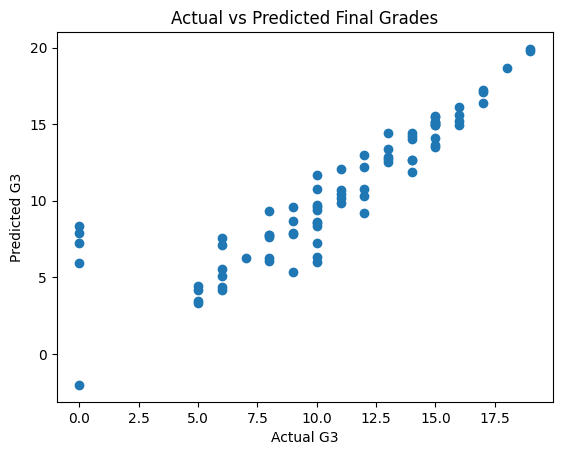

In [13]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.show()

In [14]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,G2,3.673540
0,G1,0.463977
4,absences,0.329998
2,studytime,-0.059473
3,failures,-0.334759


In [16]:
def predict_new_student(G1, G2, studytime, failures, absences):
    """
    Predict final grade (G3) for a new student.
    """

    # Create DataFrame with same feature order
    new_data = pd.DataFrame([[G1, G2, studytime, failures, absences]],
                            columns=['G1', 'G2', 'studytime', 'failures', 'absences'])

    # Scale using previously fitted scaler
    new_data_scaled = scaler.transform(new_data)

    # Predict
    predicted_g3 = model.predict(new_data_scaled)

    print("===== NEW STUDENT PREDICTION =====")
    print(f"G1: {G1}")
    print(f"G2: {G2}")
    print(f"Study Time: {studytime}")
    print(f"Failures: {failures}")
    print(f"Absences: {absences}")
    print(f"\nPredicted Final Grade (G3): {round(predicted_g3[0], 2)}")

    return predicted_g3[0]

In [ ]:
def interactive_prediction():
    print("Enter new student information:")
    
    G1 = float(input("G1 (0-20): "))
    G2 = float(input("G2 (0-20): "))
    studytime = float(input("Study Time (1-4): "))
    failures = float(input("Past Failures: "))
    absences = float(input("Absences: "))
    
    predict_new_student(G1, G2, studytime, failures, absences)

In [23]:
interactive_prediction()

Enter new student information:


ValueError: could not convert string to float: ''